In [1]:
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from matplotlib import dates
import matplotlib.lines as mlines
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline
import json

In [ ]:
def split_string(string_to_split, delimiter):
  result_list = []
  tokens = string_to_split.split(delimiter)
  for i in range(len(tokens) - 1):
    result_list.append(tokens[i])
  result_list.append(tokens[len(tokens)-1])
  return  result_list

In [ ]:
#SUCCESSFULLY split text into separate records where each "line" record, saved as json file
myFile = open('posts_author_only.txt').read()

newFile = split_string(myFile,"-------------------------------")

for line in newFile:
    line = line.rstrip()
    print(line)
    break


In [ ]:

citation=[]

for line in newFile:
    record={}
    score = re.findall(r'^\n([0-9]+) :',line)
    date= re.findall(r'(20[0-9][0-9]-[0-9][0-9]-[0-9][0-9])\n',line)
    author= re.findall(r'\n([a-zA-Z0-9_-][0-9a-zA-Z_-]{3,19})\n',line)
    
    try:
        record['Score']=score[0]
    except:
        record['Score']= 1
    
    try:
        record['Date']= date[0]
    except:
        record['Date'] = 'NaN'
        
    try:
        record['Author'] = author[0]
    except:
        record['Author'] = "Deleted"
        
    citation.append(record)


In [ ]:

#Saving to JSON File
with open('submission.txt','w') as outfile:
    json.dump(citation,outfile)

In [2]:
reddit = pd.read_json('submission.txt', orient = 'records')

reddit

,Score,Date,Author
0,1,2021-02-21,Crumblestilskin
1,1,2021-02-21,harlygold1965
2,1,2021-02-21,BamaCraneGuy
3,1,2021-02-21,paradox34690
4,1,2021-02-21,IagoInTheLight
...,...,...,...
89446,2,2014-11-21,g4r4e0g
89447,5,2013-07-07,wtbreach
89448,3,2013-05-09,proptrader123
89449,3,2013-03-10,Bowlthizar


In [3]:
# Counting number of '0' in Dates.  These Dates will be removed
reddit = reddit.dropna(thresh = 3)

reddit.count(0)


Score     89334
Date      89334
Author    89334
dtype: int64

In [12]:
hi_scores = reddit.sort_values('Score',ascending = False)

hi_scores.head(40)


,Score,Date,Author
10333,76968,2021-02-02,JoeWelburg
9652,59958,2021-02-02,misterYOLOdolo
8879,58495,2021-02-03,dudesonly69
18015,56728,2021-02-01,SenateMajorityLeader
10856,55650,2021-02-02,red-t-shirt
16773,47512,2021-02-01,RVCFever
17327,44196,2021-02-01,soggypoopsock
11720,42816,2021-02-02,handypanda93
9600,42736,2021-02-02,astroxlogical
12401,42466,2021-02-02,FireRngesus


In [5]:
#Counting number of 'Deleted' in Authors
deleted_authors = 0
for i in reddit['Author']:
    if i == 'Deleted':
        deleted_authors +=1

print(deleted_authors)

424


In [6]:
#Counting posts by DeepFuckingValue
dfv = reddit['Author']=="DeepFuckingValue"
reddit_dfv = reddit[dfv]
reddit_dfv
    


,Score,Date,Author
89066,180,2020-04-14,DeepFuckingValue


In [7]:
#slicing the time to 12-31-20 to 02-21-21
reddit_time = reddit.copy()
reddit_time.set_index('Date', inplace = True)


reddit_time

             

,Score,Author
Date,,
2021-02-21,1,Crumblestilskin
2021-02-21,1,harlygold1965
2021-02-21,1,BamaCraneGuy
2021-02-21,1,paradox34690
2021-02-21,1,IagoInTheLight
...,...,...
2014-12-10,3,MerBank
2014-11-21,2,g4r4e0g
2013-07-07,5,wtbreach


In [8]:
#deleted_authors = [reddit_time['Author'] == 'Deleted']
reddit_time_deleted = reddit_time[reddit_time['Author'] == 'Deleted']
reddit_time_deleted.sort_values('Score', ascending = False)

,Score,Author
Date,,
2021-02-04,24193,Deleted
2021-02-02,1871,Deleted
2021-02-02,1787,Deleted
2021-02-03,758,Deleted
2021-02-04,519,Deleted
...,...,...
2021-02-02,0,Deleted
2021-02-02,0,Deleted
2021-02-02,0,Deleted


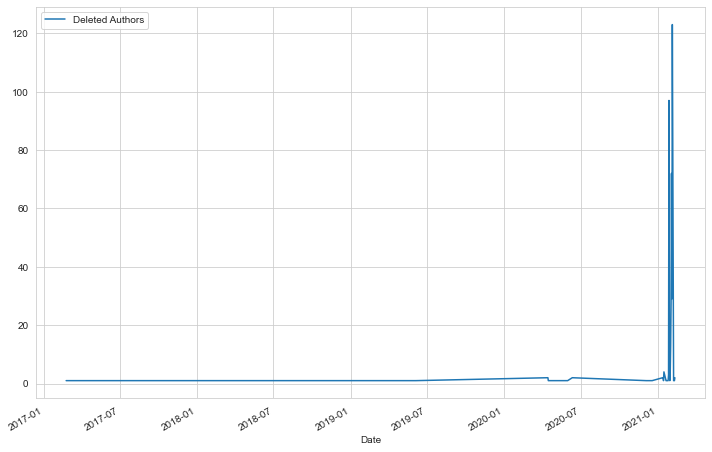

In [9]:
reddit_deleted_gb = reddit_time_deleted.groupby('Date').agg({"Author":'count'})
reddit_deleted_gb.rename(columns={'Author': 'Deleted Authors'}, inplace = True)
reddit_deleted_gb.plot(figsize=(12,8));

In [10]:
dates_gb = reddit.groupby("Date")

authors_gb = dates_gb.agg({'Author': 'nunique', 'Score':'count'})

authors_gb=authors_gb.sort_values('Date', ascending = False)

authors_gb.rename(columns = {'Score': 'Number of Posts'}, inplace = True)


authors_gb.head(40)

,Author,Number of Posts
Date,,
2021-02-21,50,55
2021-02-20,144,154
2021-02-19,238,256
2021-02-18,386,420
2021-02-17,133,150
2021-02-16,49,52
2021-02-15,138,163
2021-02-14,108,112
2021-02-13,144,165


In [ ]:
scores_gb = reddit.groupby("Date")
scores_gb = scores_gb.agg({'Score':'max'})
scores_gb.rename(columns = {'Score': 'Max Author Karma Score'}, inplace = True)
combined = pd.concat([authors_gb,scores_gb,reddit_deleted_gb], axis = 1, join = 'outer')
combined.head(40)

In [13]:
#combined.to_csv('PostsByDate.csv')

In [ ]:

authors_gb['2021-02-21':'2020-12-01'].plot(figsize = (12,8));

In [24]:
gme = pd.read_csv('GME.csv')
gme['Date']=pd.to_datetime(gme['Date'])
gme=gme.set_index('Date')
gme.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-01,7.30,7.82,6.77,7.65,7.65,23211000
2020-09-02,7.80,8.05,7.11,7.71,7.71,13011100
2020-09-03,7.88,8.45,7.24,7.82,7.82,14344500
2020-09-04,7.78,7.92,7.17,7.65,7.65,7662000
2020-09-08,7.55,8.28,7.48,7.70,7.70,9816600


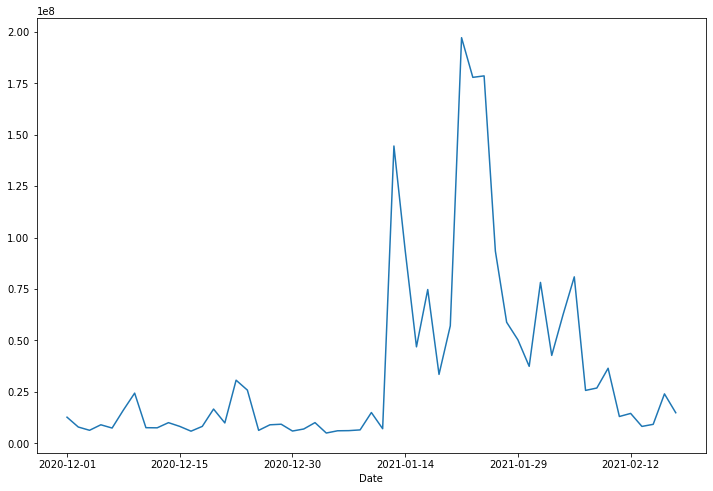

In [15]:
gme['Volume']['2020-12-01':'2021-02-21'].plot(figsize = (12,8))

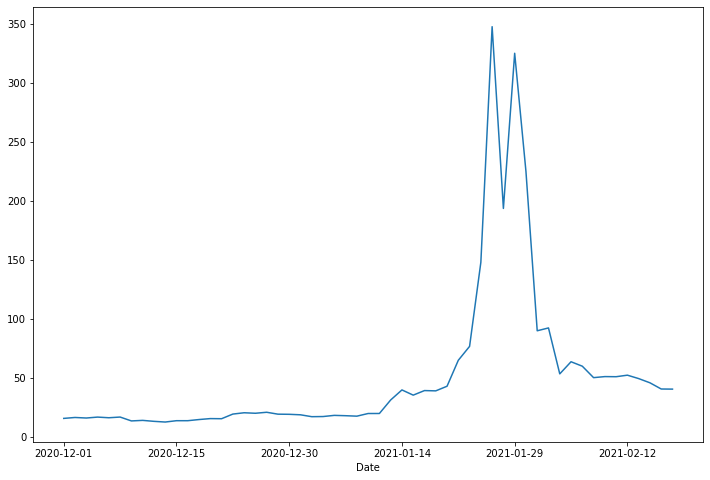

In [16]:
gme['Close']['2020-12-01':'2021-02-21'].plot(figsize = (12,8));


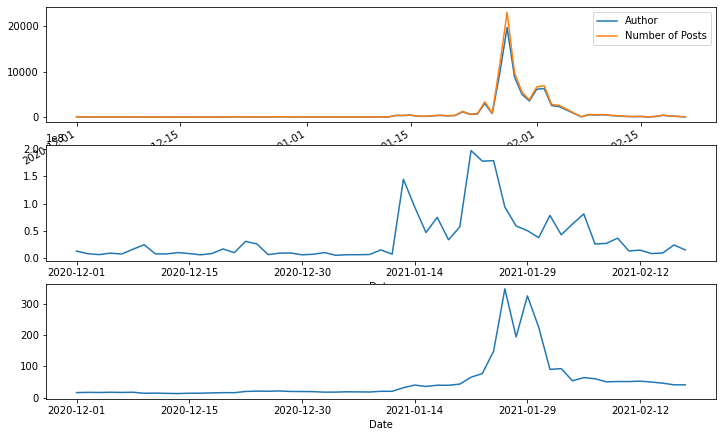

In [17]:
figure, axes = plt.subplots(3,1)
authors_gb['2021-02-21':'2020-12-01'].plot(ax = axes[0],figsize = (12,8));
gme['Volume']['2020-12-01':'2021-02-21'].plot(ax = axes[1],figsize = (12,8));
gme['Close']['2020-12-01':'2021-02-21'].plot(ax = axes[2],figsize = (12,8));




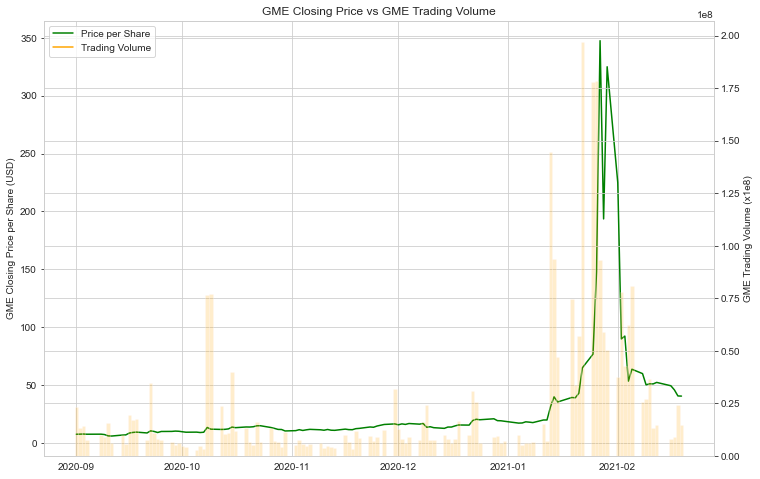

In [25]:
blue_line = mlines.Line2D([],[], color = 'blue', label = 'Number of Posts') 
orange_line = mlines.Line2D([],[], color = 'orange', label = 'Trading Volume') 
red_line = mlines.Line2D([],[], color = 'red', label = 'Number of Comments') 
green_line = mlines.Line2D([],[], color = 'green', label = 'Price per Share') 
purple_line = mlines.Line2D([],[], color = 'purple', label = 'Max Author Karma Score')

fig, ax1= plt.subplots(figsize = (12,8))
ax2 = ax1.twinx()
ax2.bar(gme.index,gme['Volume'],width = 1,alpha = 0.2, color = 'orange')
ax1.plot(gme.index,gme['Close'],  color = 'green')
ax1.set_title('GME Closing Price vs GME Trading Volume')
ax1.set_ylabel('GME Closing Price per Share (USD)')
ax2.set_ylabel('GME Trading Volume (x1e8)')

plt.legend(handles = [green_line,orange_line], loc = 2);


In [ ]:
posts = pd.read_csv('PostsByDate.csv')
posts.set_index('Date', inplace = True)


In [ ]:
posts.head()

In [ ]:
comments = pd.read_csv('CommentByDate.csv')

In [ ]:
comments.head()

In [ ]:
comments['Date'].min()

In [ ]:
comments.set_index('Date', inplace = True)
comments.rename(columns = {'Score': "Number of Comments"}, inplace = True)
comments

In [ ]:
authors_gb.index.min()

In [ ]:
print(len(comments), len(authors_gb))

In [ ]:
posts['2021-02-21':'2020-12-01'].plot(figsize = (12,8));
comments['2021-02-21':'2020-12-01'].plot(figsize = (12,8));

In [ ]:
combined = pd.concat([posts,comments],axis = 1, join = 'outer')

In [ ]:
combined.head()

In [ ]:
#combined = combined.dropna(0)


In [ ]:
combined.head()

In [ ]:
combined['2021-02-21':'2020-08-01'].plot(figsize = (12,8));

In [ ]:
gme = pd.read_csv('gme.csv')

In [ ]:
gme.set_index('Date', inplace = True)


In [ ]:
gme.head()

In [ ]:
combined_gme = pd.concat([combined,gme],axis = 1,join="outer")

In [ ]:
combined_gme

In [ ]:
combined_gme.to_csv('CombinedGME.csv')